In [ ]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
playstore_df = pd.read_csv("/Users/aisha/Documents/AnalysisProjects/PlayStoreAnalysis/Data05/googleplaystore.csv")
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB



From a business perspective, it is essential for these columns to be in numeric format:

1. Rating 
2. Reviews
3. Size
4. Price

## Data Cleaning



In [5]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [6]:
# From observing above, we can note that all data here should be numeric. Replace all non-numeric values with NaN

playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')
playstore_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [7]:
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [8]:
# note that about million bytes make up a megabyte and one megabyte is equivalent to 1024 kilobytes

def fix_size(size):
    """
    Convert the size string to a standardized numeric representation.

    Parameters:
        size (str): The size string, e.g., '5.2M', '200k', '1,000+'.

    Returns:
        float or np.nan: The converted size in megabytes (MB), or np.nan if unknown.
    """
    
    if size.endswith('M'):
        return float(size[:-1])
    elif size.endswith('k'):
        return float(size[:-1]) / 1024
    elif size == '1,000+':
        return float(1)        
    else:
        return np.nan

In [9]:
playstore_df['Size'] = playstore_df['Size'].apply(fix_size)
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [10]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [11]:
playstore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [12]:
def edit_price(price):
    """
    Convert the price string to a standardized numeric representation.

    Parameters:
        price (str): The price string, e.g., 'Free', '$2.99', 'Everyone'.

    Returns:
        float or np.nan: The converted price, or np.nan if unknown or free.
    """
    
    if price == '0' or price == 'Everyone':
        return float(0)
    elif price.startswith('$'):
        return float(price[1:])
    else:
        return np.nan

In [13]:
# Change Price column into float numbers

playstore_df['Price'] = playstore_df['Price'].apply(edit_price)

In [14]:
playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
playstore_df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


In [16]:
playstore_df[playstore_df['Rating'] > 5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
index = playstore_df[playstore_df['Rating'] > 5].index

In [18]:
# Delete row from dataset since it contains mostly bad information.

playstore_df.drop(index, axis = 0, inplace=True)

In [19]:
playstore_df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


## Univarant Analysis of Categorical Columns

In [20]:
# Convert the 'Category' column values into readable titles to ensure consistent capitalization

playstore_df['Category'] = playstore_df['Category'].apply(lambda letter : letter.title())

In [21]:
playstore_df['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)

In [22]:
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
playstore_df['Installs'].value_counts()


1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [24]:
playstore_df['Type'].unique()


array(['Free', 'Paid', nan], dtype=object)

In [25]:
playstore_df['Android Ver'].value_counts()


4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [26]:
playstore_df['Genres'].unique()


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [27]:
delete_cols = ["Genres","Last Updated","Current Ver"]

playstore_df.drop(delete_cols, axis = 1, inplace=True)
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,4.1 and up
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Varies with device


In [28]:
playstore_df.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Android Ver          2
dtype: int64

In [29]:
playstore_df.isna().mean() * 100


App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Android Ver        0.018450
dtype: float64

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
playstore_df['Android Ver'] = imputer.fit_transform(playstore_df[['Android Ver']])
playstore_df['Type'] = imputer.fit_transform(playstore_df[['Type']])

playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Android Ver          0
dtype: int64

In [31]:
from sklearn.impute import KNNImputer

Knnimputer = KNNImputer()

playstore_df['Rating'] = Knnimputer.fit_transform(playstore_df[['Rating']])
playstore_df['Size'] = Knnimputer.fit_transform(playstore_df[['Size']])

playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Android Ver       0
dtype: int64

In [32]:
playstore_df.shape

(10840, 10)

In [33]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Android Ver     10840 non-null  object 
dtypes: float64(4), object(6)
memory usage: 931.6+ KB


In [34]:
def check_outlier(playstore_df, col):
    plt.figure()
    sns.boxplot(x = col, data=playstore_df)


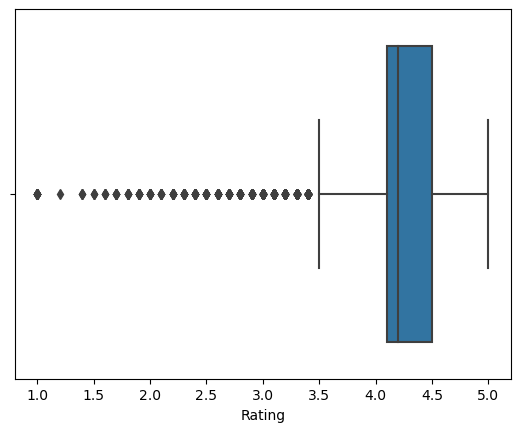

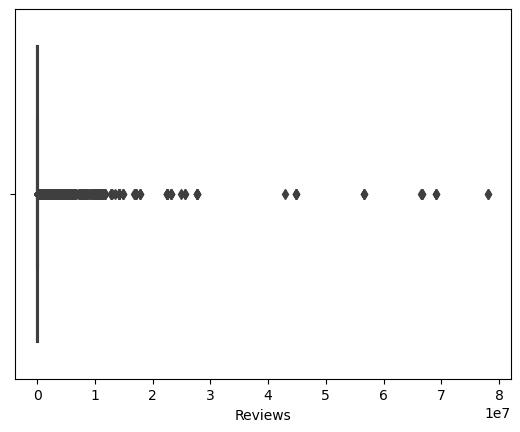

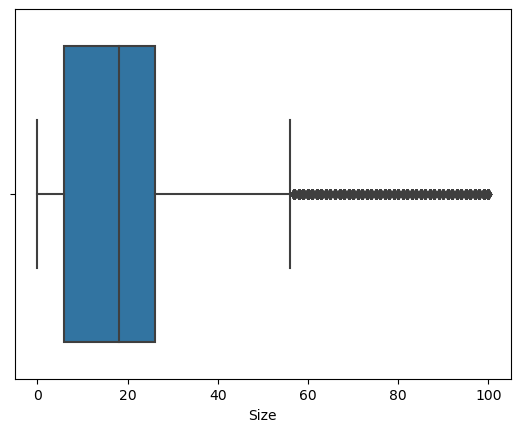

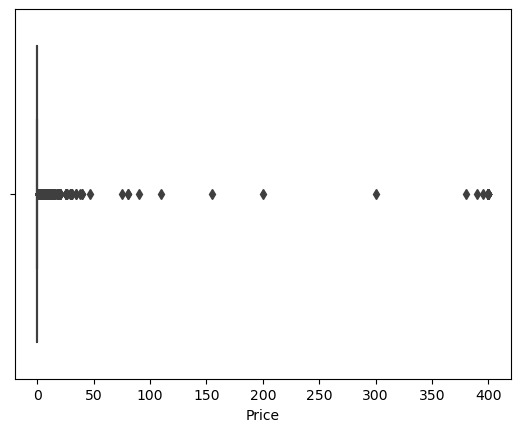

In [35]:
for col in ['Rating', 'Reviews', 'Size', 'Price']:
    check_outlier(playstore_df, col)

### __1. What is the most expensive app in the Playstore?__


In [36]:
playstore_df[playstore_df["Price"] == playstore_df["Price"].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,4.1 and up


### __2. Which category boasts the highest number of apps?__



In [37]:
playstore_df.pivot_table(index = "Category", columns = "Type", values = 'Rating', aggfunc = 'count').sort_values(by = ['Free'], ascending=False)

Type,Free,Paid
Category,,
Family,1781.0,191.0
Game,1061.0,83.0
Tools,765.0,78.0
Business,446.0,14.0
Productivity,396.0,28.0
Lifestyle,363.0,19.0
Sports,360.0,24.0
Communication,360.0,27.0
Medical,354.0,109.0


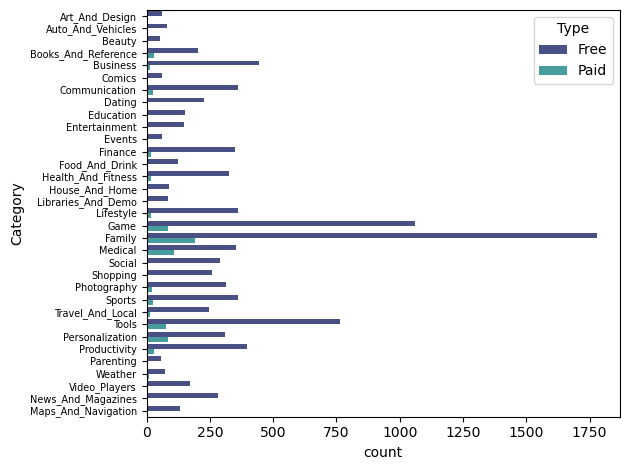

In [91]:
count_graph = sns.countplot(y='Category', data = playstore_df, palette='mako', hue='Type')
count_graph.set_yticklabels(count_graph.get_yticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

Notes:

Based on the above results, it's evident that the family category has the highest frequency of apps, especially in the free section compared to the paid section. Conversely, the beauty category has the lowest frequency, with all apps being free and none being paid.

### __3. What is the average size of free & paid apps?__



In [96]:
playstore_df.pivot_table(index = "Type", values = "Size", aggfunc = "mean")

,Size
Type,
Free,21.675505
Paid,19.516453


### __4. What is the top expensive apps that have rate 5?__



In [97]:
playstore_df[playstore_df["Rating"]== 5.0].sort_values(by = "Price", ascending = False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_ver_4
5489,AP Art History Flashcards,Family,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,4.0 and up,True
7477,USMLE Step 2 CK Flashcards,Family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,2.2 and up,False
5246,Hey AJ! It's Bedtime!,Family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,2.3 and up,False
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,4.1 and up,True
5482,meStudying: AP English Lit,Family,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,2.0.1 and up,False


Note:

As observed later, the family category stands out as the most abundant in terms of apps. Hence, it logically follows that the priciest apps would originate from this category.


### __5. How many apps that has more than 50k reviews.__


In [40]:
playstore_df[playstore_df["Reviews"] > 50000].sort_values(by = 'Reviews', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
2544,Facebook,Social,4.1,78158306.0,21.516165,"1,000,000,000+",Free,0.0,Teen,Varies with device
3943,Facebook,Social,4.1,78128208.0,21.516165,"1,000,000,000+",Free,0.0,Teen,Varies with device
336,WhatsApp Messenger,Communication,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,Varies with device
381,WhatsApp Messenger,Communication,4.4,69119316.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,Varies with device
3904,WhatsApp Messenger,Communication,4.4,69109672.0,21.516165,"1,000,000,000+",Free,0.0,Everyone,Varies with device
...,...,...,...,...,...,...,...,...,...,...
3046,Fantasy Football,Sports,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,5.0 and up
3098,Fantasy Football,Sports,3.5,50179.0,23.000000,"1,000,000+",Free,0.0,Everyone,5.0 and up
8294,Bokeh (Background defocus),Photography,4.0,50109.0,21.516165,"10,000,000+",Free,0.0,Everyone,Varies with device
9677,Masha and The Bear Jam Day Match 3 games for kids,Family,4.6,50060.0,98.000000,"1,000,000+",Free,0.0,Everyone,4.1 and up


Note:

Facebook has the highest number of reviews among all apps.


### __6. What is the average price of the apps for each genre with each installs numbers.__


In [41]:
playstore_df.pivot_table(index = "Category", columns = "Installs", values = 'Price', aggfunc = "mean")

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
Art_And_Design,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
Auto_And_Vehicles,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
Beauty,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
Books_And_Reference,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
Business,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
Comics,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
Communication,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
Dating,NaN,NaN,0.000000,0.411176,0.000000,NaN,0.000000,0.295556,0.000000,0.787895,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
Education,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.285000,NaN


We created a pivot table to facilitate the analysis of average app prices. This allows us to examine the average prices per installation category and genre category.


<Axes: xlabel='Reviews'>

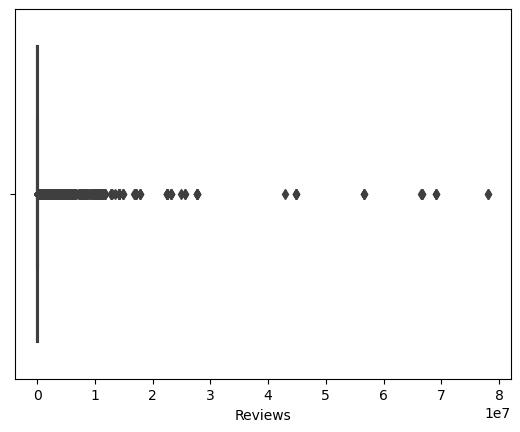

In [42]:
sns.boxplot(x = "Reviews", data=playstore_df)


### __7. How many applications possess a rating surpassing 4.7, and what is the average price associated with these apps?.__

In [43]:
# Filter apps with a rating greater than 4.7
high_rating = playstore_df[playstore_df["Rating"] > 4.7]

# Calculate and display the average price of these highly-rated apps

cnt_result = "The number of applications with a rating greater than 4.7 is {}".format(len(high_rating))
print(cnt_result)

avg = round(high_rating['Price'].mean(),3)
avg_result = "The average price of applications with a rating greater than 4.7 is {}".format(avg)
print(avg_result)

The number of applications with a rating greater than 4.7 is 595
The average price of applications with a rating greater than 4.7 is 0.502


In [44]:
high_rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
25,Harley Quinn wallpapers HD,Art_And_Design,4.8,192.0,6.000000,"10,000+",Free,0.0,Everyone,3.0 and up
55,Tickets SDA 2018 and Exam from the State Traff...,Auto_And_Vehicles,4.9,10479.0,33.000000,"100,000+",Free,0.0,Everyone,4.0 and up
61,CDL Practice Test 2018 Edition,Auto_And_Vehicles,4.9,7774.0,17.000000,"100,000+",Free,0.0,Everyone,4.2 and up
64,DMV Permit Practice Test 2018 Edition,Auto_And_Vehicles,4.9,6090.0,27.000000,"100,000+",Free,0.0,Everyone,4.2 and up
70,Fines of the State Traffic Safety Inspectorate...,Auto_And_Vehicles,4.8,116986.0,35.000000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...
10801,Fr Ignacio Outreach,Family,4.9,52.0,19.000000,"1,000+",Free,0.0,Everyone,4.4 and up
10810,Fr Lupupa Sermons,Business,4.8,19.0,21.000000,100+,Free,0.0,Everyone,4.4 and up
10820,Fr. Daoud Lamei,Family,5.0,22.0,8.600000,"1,000+",Free,0.0,Teen,4.1 and up
10833,Chemin (fr),Books_And_Reference,4.8,44.0,0.604492,"1,000+",Free,0.0,Everyone,2.2 and up


### __8.What is Google's revenue generated from apps with 5,000,000 installations?__



In [45]:
playstore_df[playstore_df["Installs"] == "5,000,000+"]["Price"].sum()

0.0

Note: This means that all apps with over 5,000,000 installations are free of charge.


### __9. What is the max and min size of free & paid apps.__



In [46]:
playstore_df[playstore_df["Size"] == playstore_df["Size"].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
1080,Post Bank,Finance,4.5,60449.0,100.0,"1,000,000+",Free,0.00,Everyone,4.0 and up
1565,Talking Babsy Baby: Baby Games,Lifestyle,4.0,140995.0,100.0,"10,000,000+",Free,0.00,Everyone,4.0 and up
1758,Hungry Shark Evolution,Game,4.5,6074334.0,100.0,"100,000,000+",Free,0.00,Teen,4.1 and up
1793,Mini Golf King - Multiplayer Game,Game,4.5,531458.0,100.0,"5,000,000+",Free,0.00,Everyone,4.0.3 and up
1988,Hungry Shark Evolution,Game,4.5,6074627.0,100.0,"100,000,000+",Free,0.00,Teen,4.1 and up
2299,Navi Radiography Pro,Medical,4.7,11.0,100.0,500+,Paid,15.99,Everyone,4.0.3 and up
3973,Hungry Shark Evolution,Game,4.5,6071542.0,100.0,"100,000,000+",Free,0.00,Teen,4.1 and up
4690,Vi Trainer,Health_And_Fitness,3.6,124.0,100.0,"5,000+",Free,0.00,Everyone,5.0 and up
5427,Ultimate Tennis,Sports,4.3,183004.0,100.0,"10,000,000+",Free,0.00,Everyone,4.0.3 and up
5530,The Walking Dead: Our World,Game,4.0,22435.0,100.0,"1,000,000+",Free,0.00,Teen,5.0 and up


In [47]:
playstore_df[playstore_df["Size"] == playstore_df["Size"].min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
1532,Essential Resources,Libraries_And_Demo,4.6,237.0,0.008301,"50,000+",Free,0.0,Everyone,7.1 and up


### __10. Is there a correlation between Ratting, Reviews, Size with the price of the app.__



In [50]:
# Observe correlation
corr_matrix = playstore_df.corr()
corr_matrix

,Rating,Reviews,Size,Price
Rating,1.000000,0.068018,0.074864,-0.020190
Reviews,0.068018,1.000000,0.128255,-0.009667
Size,0.074864,0.128255,1.000000,-0.022995
Price,-0.020190,-0.009667,-0.022995,1.000000


By observing the correlation coefficients between app ratings, reviews, size, and price, it can be seen that there exists weak relationships. A heatmap visualization is the next step to provide a clearer overview of the inter-variable associations.


<Axes: >

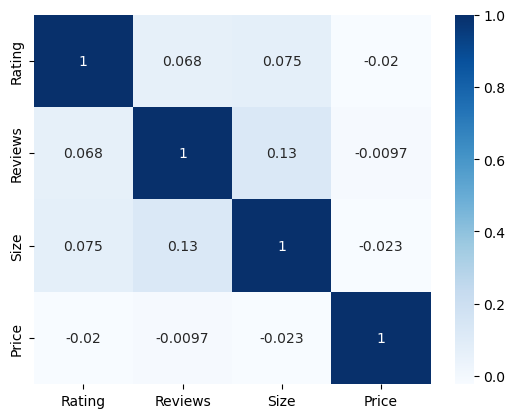

In [61]:
sns.heatmap(corr_matrix, annot=True,cmap="Blues")

Note: The correlation between price and other features is minimal or virtually nonexistent.

### __11. What is the distribution of apps for each content rating within each type?__ 

In [65]:
a = playstore_df.pivot_table(index = "Content Rating", columns = "Type", values = 'Price', aggfunc = 'count').sort_values(by = ['Free'], ascending=False)
a.fillna(0)

Type,Free,Paid
Content Rating,,
Everyone,8019.0,695.0
Teen,1156.0,52.0
Mature 17+,479.0,20.0
Everyone 10+,381.0,33.0
Adults only 18+,3.0,0.0
Unrated,2.0,0.0


### __12. What is the count of apps compatible with Android 4?__

In [67]:
playstore_df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [90]:
def compatible_version_four(version):
    """
    Check if the given Android version is compatible with version 4.

    Parameters:
        version (str): The Android version string.

    Returns:
        bool: True if compatible with version 4, False otherwise.
    """
    
    major_version = version[0]
    
    return major_version.isnumeric() and int(major_version) == 4
    
playstore_df['is_ver_4'] = playstore_df['Android Ver'].apply(compatible_version_four)
playstore_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.100000,159.0,19.000000,"10,000+",Free,0.0,Everyone,4.0.3 and up,True
1,Coloring book moana,Art_And_Design,3.900000,967.0,14.000000,"500,000+",Free,0.0,Everyone,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.700000,87510.0,8.700000,"5,000,000+",Free,0.0,Everyone,4.0.3 and up,True
3,Sketch - Draw & Paint,Art_And_Design,4.500000,215644.0,25.000000,"50,000,000+",Free,0.0,Teen,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.300000,967.0,2.800000,"100,000+",Free,0.0,Everyone,4.4 and up,True
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38.0,53.000000,"5,000+",Free,0.0,Everyone,4.1 and up,True
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4.0,3.600000,100+,Free,0.0,Everyone,4.1 and up,True
10838,Parkinson Exercices FR,Medical,4.191757,3.0,9.500000,"1,000+",Free,0.0,Everyone,2.2 and up,False
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.500000,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,Varies with device,False


In [87]:
len( playstore_df[playstore_df['is_ver_4'] == True])

6961

<Axes: xlabel='is_ver_4', ylabel='count'>

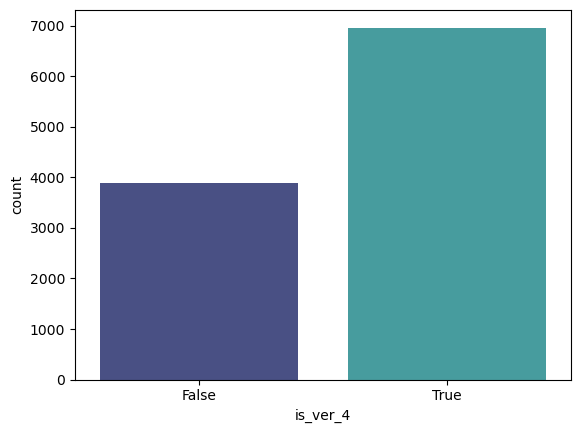

In [88]:
sns.countplot(x='is_ver_4', data = playstore_df,palette='mako')